<a href="https://colab.research.google.com/github/Siddhi-S-Thakur/Movie-Review-Sentiment-Analysis/blob/main/movieReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("IMDB Dataset.csv", engine = 'python', on_bad_lines = "skip")

## Data preprocessing

In [5]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

/tmp/ipython-input-1137712857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Converting reviews to lowercase
df['review'] = df['review'].str.lower()

In [8]:

# Removing HTML tags from reviews
import re

def remove_html(text):
    pattern = r'<.*?>'
    text = re.sub(pattern, '', text)
    return text

df['review'] = df['review'].apply(remove_html)


In [9]:
df.head(2)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1


In [10]:
import nltk

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def remove_urls(text):
    pattern = r'https?://\S+|www\.\S+'
    return re.sub(pattern, '', text)

df['review'] = df['review'].astype(str).apply(remove_urls)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [14]:
X = df['review']
y = df['sentiment']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF

In [16]:
#transform the text data into numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### ML Models

In [17]:
#Logistic Regression Model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500)

In [18]:
y_pred = log_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8412


In [19]:
log_acc = accuracy_score(y_test, log_model.predict(X_test_tfidf))
print(f"Logistic Regression Accuracy: {log_acc:.4f}")

Logistic Regression Accuracy: 0.8412


In [20]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rnd_model = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rnd_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8066


In [22]:
rf_acc = accuracy_score(y_test, rnd_model.predict(X_test_tfidf))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.8066


In [23]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = dt_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6792


In [25]:
dt_acc = accuracy_score(y_test, dt_model.predict(X_test_tfidf))
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.6792


In [27]:
pip install xgboost tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.7/131.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.2/225.2 kB 12.1 MB/s eta 0:00:00


In [28]:
# XGBoost Model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder= False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [10:48:03] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
y_pred = xgb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7877


In [30]:
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test_tfidf))
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.7877


In [31]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)


KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6950


In [33]:
knn_acc = accuracy_score(y_test, knn_model.predict(X_test_tfidf))
print(f"KNN Accuracy: {knn_acc:.4f}")

KNN Accuracy: 0.6950


### DL tf-Keras Model

In [49]:
import tensorflow as tf

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [51]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [52]:
# Tokenize text data

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen = 200)
X_test = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen = 200)

In [53]:
# prepareing target variables

Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [54]:
# Building LSTM model

model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim=128, input_shape=(200,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
#Compiling the model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
#Training the model

model.fit(X_train, Y_train, epochs = 8, batch_size= 100, validation_split = 0.2)

Epoch 1/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.5213 - loss: 0.6899 - val_accuracy: 0.7250 - val_loss: 0.6585
Epoch 2/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step - accuracy: 0.8027 - loss: 0.5607 - val_accuracy: 0.8035 - val_loss: 0.4405
Epoch 3/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - accuracy: 0.9165 - loss: 0.2561 - val_accuracy: 0.7917 - val_loss: 0.4366
Epoch 4/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 0.9558 - loss: 0.1621 - val_accuracy: 0.8035 - val_loss: 0.4879
Epoch 5/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - accuracy: 0.9815 - loss: 0.0858 - val_accuracy: 0.8055 - val_loss: 0.5125
Epoch 6/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - accuracy: 0.9948 - loss: 0.0311 - val_accuracy: 0.7937 - val_loss: 0.6158
Epoch 7/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - accuracy: 0.9982 - loss: 0.0147 - val_accuracy: 0.7800 - val_loss: 0.6164
Epoch 8/8
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.9996 - loss: 0.0121 - val_accuracy: 0.8035 - 

In [57]:
loss, dl_acc = model.evaluate(X_test, Y_test)
print(f"Deep Learning Accuracy: {dl_acc:.4f}")

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2544
'y' sizes: 636


In [37]:
model_names = [
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "XGBoost",
    "KNN",

]

accuracies = [
    log_acc,
    rf_acc,
    dt_acc,
    xgb_acc,
    knn_acc,
]

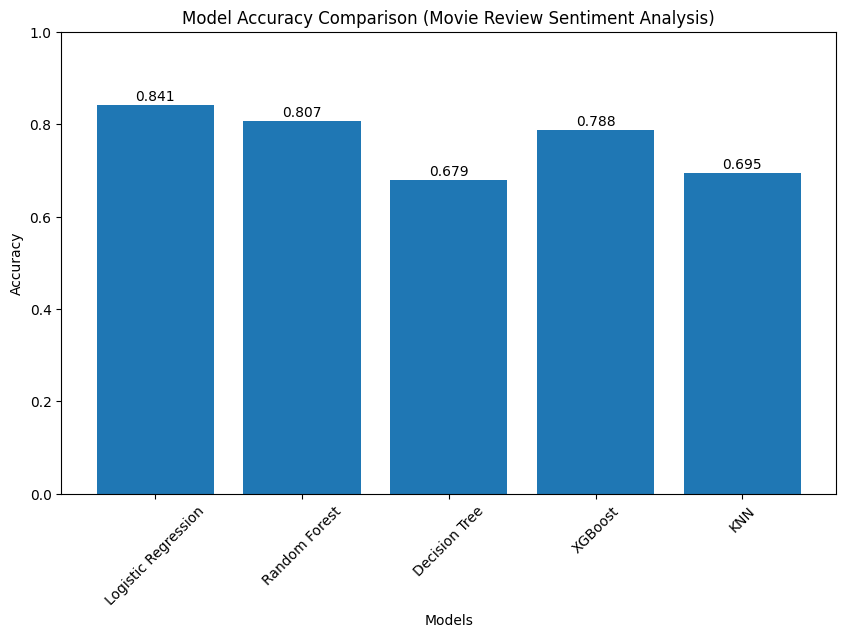

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.bar(model_names, accuracies)

plt.title("Model Accuracy Comparison (Movie Review Sentiment Analysis)")
plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.xticks(rotation=45)
plt.ylim(0,1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [47]:
# Function to Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Add numbers inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center",
                     color="white" if cm[i, j] > cm.max()/2 else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


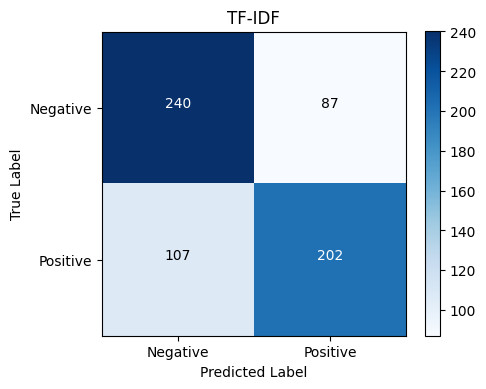

In [48]:
plot_confusion_matrix(y_test, y_pred, "TF-IDF")